# Regression Metrics and Loss Functions

We've seen two examples of _loss functions_ earlier in the week in the context of regularization:
* The sum of squared errors:
$$\sum_{i}{\left(\hat{y}_i - y_i \right)^2}$$
* Regularlized versions
$$\sum_{i}{\left(\hat{y}_i - y_i \right)^2 + \alpha \theta_i}$$

In this lesson we're going to dig deeper into loss functions and their applications. Different loss functions are useful in different scenarios and there are two very popular loss functions that are used in conjuction with regression. In this case they are sometimes referred to as _regression metrics_.

The first is the _root mean squared error_ or _RMSE_ and it is the mean of the squared errors. If we $n$ regression points and their predictions, the [RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation) is:

$$\text{RMSE} = \sqrt{\frac{\sum_{i}{\left(\hat{y}_i - y_i \right)^2}}{n}}$$

The second is the _mean absolute error_ or _MAE_, and it differs by use of an absolute value instead of a square. The [MAE](https://en.wikipedia.org/wiki/Average_absolute_deviation) is:

$$\text{MAE} = \frac{\sum_{i}{|\hat{y}_i - y_i |}}{n}$$

## Why have different regression metrics?

You might be thinking, _what's all the fuss about_? It turns out that there are lots of good reasons to use different loss functions. We've seen one -- regularization -- and now we'll consider the effects of outliers on these two metrics.

First let's try a very simplified statistics problem. Given a dataset, how can we summarize it with a single number? Do you know any ways?

This is equivalent to fitting a constant model to the data. It turns out that the _mean_ minimizes the RMSE and the _median_ minimizes the MAE. By analogy, when fitting a model, MAE is more tolerant to outliers. In other words, the degree of error of an outlier has a large impact when using RMSE versus the MAE. Since the choice of loss function affects model fit, it's important to consider how you want errors to impact your models.

**Summary**
* Use MAE when how far off an error is makes little difference
* Use RMSE when more extreme errors should have a large impact

Finally, note that linear regressions with MAE instead of RMSE are called _least absolute deviation_ regressions rather than least squares regressions.

### Bonus: Modes

It turns out the _mode_ minimizes the sum:
$$\frac{\sum_{i}{|\hat{y}_i - y_i |^{0}}}{n}$$
where $0^0=0$ and $x^0=1$ otherwise. Can you see why?


# Guided practice

Let's compute the RMSE and the MAE for a sample data set. Let's say we had a quadratic function that we fit a line to:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import linear_model
import statsmodels.formula.api as smf

In [2]:
def true_function(x):
    return 1 + x**2

def estimated_function(x):
    return 2*x

In [3]:
xs = pd.Series(np.arange(-1, 6, 1))
ys = xs.apply(true_function)
predictions = xs.apply(estimated_function)

First do the calculation by hand to see how large each term is

.

.


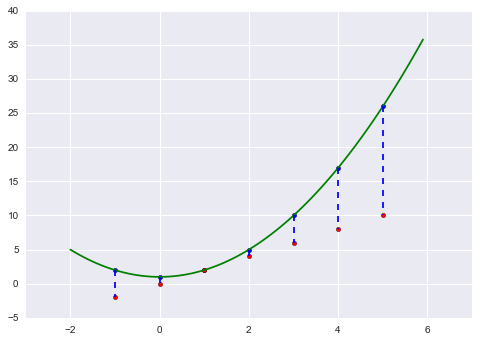

In [4]:
# Plotting
plt.scatter(xs, ys)
plt.scatter(xs, predictions, c="red")

x_r = pd.Series(np.arange(min(xs)-1, max(xs)+1, 0.1))
y_r = x_r.apply(true_function)
plt.plot(x_r, y_r, c='g', ls='-')

for (x, y_true, y_pred) in zip(xs, ys, predictions):
    plt.plot((x, x), (y_true, y_pred), ls='--', c='b')
plt.show()

#### Create functions to calculate RMSE, MAE, and the Bool Sum above:

    

In [6]:
def rmse(y_true, y_pred):
    return ((y_true - y_pred)**2).mean()**0.5
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))
def bool_sum(y_true, y_pred):
    return np.mean(np.not_equal(y_true, y_pred))


In [7]:
print "RMSE:", rmse(ys, predictions)
print "MAE:", mae(ys, predictions)
print "BoolSum:", bool_sum(ys, predictions)

RMSE: 7.28010988928
MAE: 5.0
BoolSum: 0.857142857143


In [8]:
from sklearn import metrics
print "RMSE:", metrics.
print "MAE:", ...

SyntaxError: invalid syntax (<ipython-input-8-326efbba4aa8>, line 3)

Now let's add an outlier to the data.

In [ ]:
xs[len(xs)] = 10
ys[len(ys)] = 100
predictions[len(predictions)] = 30

print "RMSE:", ...
print "MAE:", ...

Notice that the impact on the RMSE was large, a factor of 3.5, versus the impact on the MAE with a factor of 2.5.

# Independent Practice

Let's explore two scenarios to obtain a better understanding of RMSE and MAE. First let's fit two models to the same set of data, the data above. To do the least mean absolute error we will use `statsmodels`.

This generated a fit of $y = -4 + 6 x$. Let's see what a linear regression yields.

This yielded a fit of $y = -6.3750 * 8.9167 x

### Exercise

Plot the data with both functions. Which do you think fits the data better?

Finally, let's explore another scenario. Linear regression has five major assumptions, one of which is called _constant variance_ or _homoscedasticity_. It means that the errors are distributed with the same variance about the best fit line regardless of the value of the independent variables.

In practice this means that data with a persistant level of background noise can cause regression metrics to be poorly estimated. Let's take a look.